In [1]:
import cv2
import matplotlib.pyplot as plt
import shutil
import glob as glob
import os

from tqdm.auto import tqdm

In [2]:
ROOT_DATA_DIR = './external/medical-mnist/medical_mnist'
# medical_mnist_processed

## Visualize a Few Images

In [3]:
def visualize_images(root_data_path):
    plt.figure(figsize=(15, 12))
    all_data_folders = glob.glob(f"{ROOT_DATA_DIR}/*")
    for data_folder in all_data_folders:
        for i in range(6):
            all_images = glob.glob(f"{all_data_folders[i]}/*")
            for image_path in all_images:
                # Read using OpenCV in BGR format.
                image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
                image = cv2.resize(image, (224, 224))
                # Convert to RGB format
                plt.subplot(2, 3, i+1)
                plt.imshow(image, cmap='gray')
                plt.title(all_data_folders[i].split('/')[-1])
                break
    plt.show()

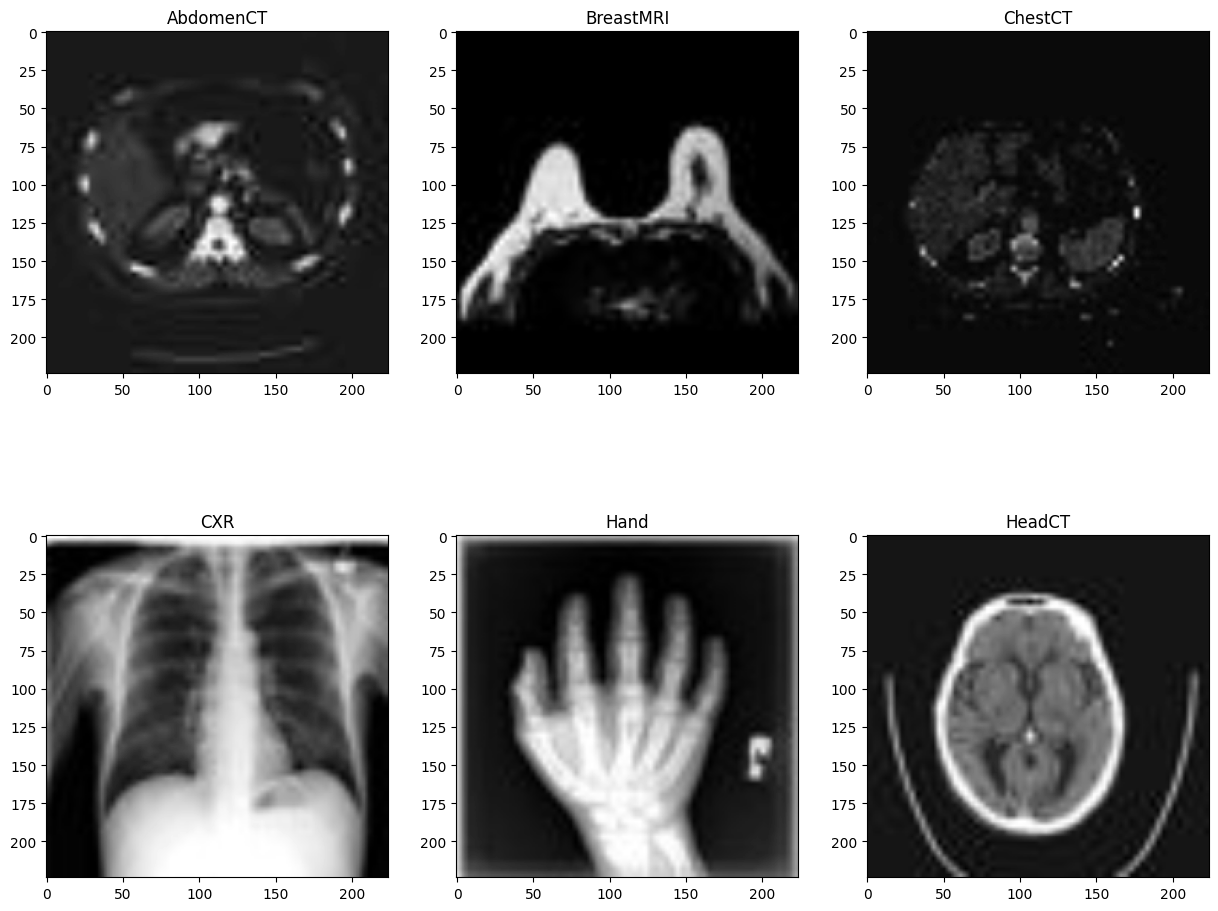

In [4]:
visualize_images(ROOT_DATA_DIR)

## Split the Dataset into Train, Validation, and Test Folder

In [6]:
TRAIN_RATIO = 0.7
VALID_RATIO = 0.2
TEST_RATIO = 0.1

In [7]:
os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/train",
        exist_ok=True
    )
os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/valid",
        exist_ok=True
    )
os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/test",
        exist_ok=True
    )

In [8]:
all_data_folders = glob.glob(f"{ROOT_DATA_DIR}/*")

In [9]:
print(all_data_folders)

['./external/medical-mnist/medical_mnist/AbdomenCT', './external/medical-mnist/medical_mnist/BreastMRI', './external/medical-mnist/medical_mnist/ChestCT', './external/medical-mnist/medical_mnist/CXR', './external/medical-mnist/medical_mnist/Hand', './external/medical-mnist/medical_mnist/HeadCT']


In [10]:
for data_folder in all_data_folders:
    all_images = glob.glob(f"{data_folder}/*")
    all_images.sort()
    class_name = data_folder.split(os.path.sep)[-1]
    print(f"{class_name}: {len(all_images)} images")
    train_images = int(TRAIN_RATIO * (len(all_images)))
    valid_images = int(VALID_RATIO * (len(all_images)))
    test_images = int(TEST_RATIO * len(all_images))
    print(
        f"Num train images: {train_images},",
        f"Num valid images: {valid_images},",
        f"Num test images: {test_images},",
    )
    
    # Process and save training images.
    os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/train/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[:train_images]), 
        total=train_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"./external/medical-mnist/medical_mnist_processed/train/{class_name}/{image_name}",
            image
        )
        
    # Process and save validation images.
    os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/valid/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[train_images: train_images+valid_images]), 
        total=valid_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"./external/medical-mnist/medical_mnist_processed/valid/{class_name}/{image_name}",
            image
        )
        
    # Process and save test images.
    os.makedirs(
        f"./external/medical-mnist/medical_mnist_processed/test/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[train_images+valid_images: train_images+valid_images+test_images]), 
        total=test_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"./external/medical-mnist/medical_mnist_processed/test/{class_name}/{image_name}",
            image
        )

AbdomenCT: 10000 images
Num train images: 7000, Num valid images: 2000, Num test images: 1000,


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

BreastMRI: 8954 images
Num train images: 6267, Num valid images: 1790, Num test images: 895,


  0%|          | 0/6267 [00:00<?, ?it/s]

  0%|          | 0/1790 [00:00<?, ?it/s]

  0%|          | 0/895 [00:00<?, ?it/s]

ChestCT: 10000 images
Num train images: 7000, Num valid images: 2000, Num test images: 1000,


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

CXR: 10000 images
Num train images: 7000, Num valid images: 2000, Num test images: 1000,


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Hand: 10000 images
Num train images: 7000, Num valid images: 2000, Num test images: 1000,


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

HeadCT: 10000 images
Num train images: 7000, Num valid images: 2000, Num test images: 1000,


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]